In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
import scipy.stats as st
import scipy.misc as mi
import scipy.optimize as op

In [6]:
N = 2000
choice = np.random.choice(2, size=N, p=[0.3,0.7])

In [12]:
ran1 = st.rayleigh.rvs(loc=0, scale=1, size=2000)
ran2 = st.rayleigh.rvs(loc=0, scale=10, size=2000)
ran = np.append(ran1[choice == 0], ran2[choice == 1])

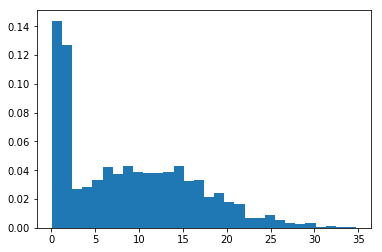

In [78]:
h, x, _ = pl.hist(ran, bins=30, normed=True)

In [72]:
def fun(x):
    """
    This function implements the log-likelihood. Since we are fitting a mixture, we have
    to use the logaddexp trick to do that and avoid underflow.
    """
    logp = np.logaddexp(np.log(x[2]) + st.rayleigh.logpdf(ran, loc=0, scale=x[0]), np.log(1.0-x[2]) + st.rayleigh.logpdf(ran, loc=0, scale=x[1]))
    return -np.sum(logp)

In [73]:
x0 = np.array([0.5,1.0,0.5])
bnds = ((0, None),(0,None),(0.0,1.0))
res = op.minimize(fun, x0, method='L-BFGS-B', jac=False, bounds=bnds, tol=1e-6)

In [83]:
x_fine = np.linspace(0.0,30,500)
sigma_1, sigma_2, f = res['x']
pdf = f * st.rayleigh.pdf(x_fine, loc=0, scale=sigma_1) + (1-f) * st.rayleigh.pdf(x_fine, loc=0, scale=sigma_2)

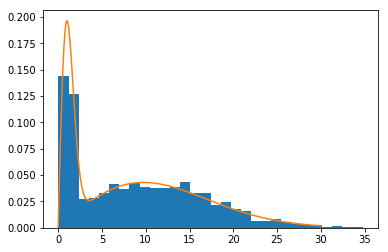

In [85]:
f, ax = pl.subplots()
ax.hist(ran, bins=30, normed=True)
ax.plot(x_fine, pdf)